## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")
# Display the data table for preview
comb_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(comb_mouse_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#use .duplicated to look for where Mouse ID and Timepoint are repeated. Keep the first row in each duplication
dupes = comb_mouse_df.duplicated(subset = ["Mouse ID","Timepoint"],keep = "first")

#create a new dataframe of just the duplicated data. Pass the dupe variable as a boolean series to the combined mouse dataframe. 
#Pandas calls this boolean indexing

duplicate_mice = comb_mouse_df[dupes]

#print all unique mouse IDs from the dataframe of duplicate mice
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dupes = comb_mouse_df.duplicated(subset = ["Mouse ID","Timepoint"],keep = False)
comb_mouse_df[dupes]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
comb_mouse_df = comb_mouse_df.loc[comb_mouse_df["Mouse ID"] != "g989",:]
comb_mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(comb_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_by_regimen = comb_mouse_df.groupby(["Drug Regimen"])

mean_tumor = round(group_by_regimen["Tumor Volume (mm3)"].mean(),3)
median_tumor = round(group_by_regimen["Tumor Volume (mm3)"].median(),3)
variance_tumor = round(group_by_regimen["Tumor Volume (mm3)"].var(),3)
std_tumor = round(group_by_regimen["Tumor Volume (mm3)"].std(),3)
sem_tumor = round(group_by_regimen["Tumor Volume (mm3)"].sem(),3)

summary_groupby_df = pd.DataFrame({
    "Mean Tumor Size":mean_tumor,
    "Median Tumor Size":median_tumor,
    "Variance":variance_tumor,
    "Standard Deviation":std_tumor,
    "SEM":sem_tumor
})
summary_groupby_df

,Mean Tumor Size,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

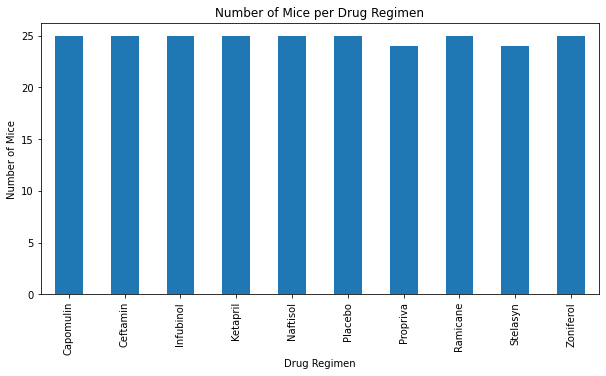

In [88]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Keep only one instance of each mouse
deduped_mice = comb_mouse_df.drop_duplicates(subset = ["Mouse ID"],keep="first")
deduped_mice

#Group the mice by Drug and count how many ID's per
mice_groups = mice_groups_df.groupby(["Drug Regimen"])

mice_count = mice_groups["Mouse ID"].count()

#Create the Chart using the mice count series just created
mouse_chart = mice_count.plot(kind = "bar",figsize=(10,5))

mouse_chart.set_ylabel("Number of Mice")
mouse_chart.set_title("Number of Mice per Drug Regimen")

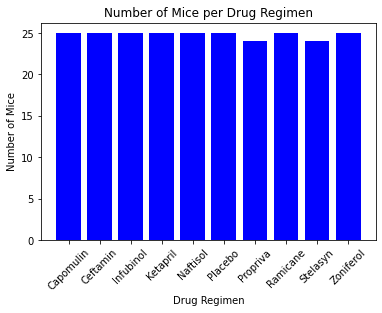

In [104]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Dataframe the mice count series so you can call each data set separately
mice_count_df = pd.DataFrame(mice_count)

#Reset the index so you can use the Drug Regimen column in your plot
mice_count_df = mice_count_df.reset_index()

#Create the chart
x_axis = mice_count_df["Drug Regimen"]
y_axis = mice_count_df["Mouse ID"]
plt.bar(x_axis,y_axis,color="b")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
